<a href="https://colab.research.google.com/github/AnakinKaleb/CAP4770-RDV/blob/main/projects/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will begin by getting the data.

In [104]:
!wget http://34.82.108.37/amazonReviewsTest.csv

--2023-04-29 03:29:23--  http://34.82.108.37/amazonReviewsTest.csv
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4240573 (4.0M) [application/octet-stream]
Saving to: ‘amazonReviewsTest.csv’

amazonReviewsTest.c 100%[===================>]   4.04M  7.70MB/s    in 0.5s    

2023-04-29 03:29:23 (7.70 MB/s) - ‘amazonReviewsTest.csv’ saved [4240573/4240573]



In [105]:
#Getting the reviews
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip

--2023-04-29 03:30:06--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  29.2MB/s    in 1.3s    

2023-04-29 03:30:08 (29.2 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]



In [ ]:
Next, I will unzip the contents.

In [106]:
#Unzipping the contents of the CSV
!unzip /content/amazonReviewsTrain.csv.zip

Archive:  /content/amazonReviewsTrain.csv.zip
  inflating: amazonReviewsTrain.csv  


In [107]:
import keras
keras.__version__

'2.12.0'

The next step is to assign the data to variables. Using this we shall predict the reating for the test data.

In [108]:
#Reading the csv's and training the model
import pandas as pd
train = pd.read_csv('amazonReviewsTrain.csv')
train = train[['reviewText', 'rating']]
test = pd.read_csv('amazonReviewsTest.csv')
test = test[['reviewText']]
train

<ipython-input-108-add5d44d87e1>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('amazonReviewsTrain.csv')


,reviewText,rating
0,Have 30 of these in operation great lights,positive
1,"Good replacement. I prefer my Rovner L5, but ...",positive
2,My son & band teacher loves it. Really nice. B...,positive
3,This was a gift for a friend who is a fan of t...,positive
4,Wish it would attach to my violin a little eas...,positive
...,...,...
221387,Still hard to beat D'Addario. Hope they keep i...,positive
221388,Ortofon hits the nail right on the head with t...,positive
221389,This is my absolute favorite guitar strap amon...,positive
221390,nice,positive


The next step is to change the alphabetical data into numerical data, to make the predictions and coding easier. 

In [109]:
#Using if statements to turn the alphabetical data into numeric data and training the model
train.reviewText = train.reviewText.astype(str)
train_text = train.reviewText
test.reviewText = train.reviewText.astype(str)
test_text = test.reviewText
train_label = train.rating
def condition(x):
    if x=='positive':
        return 2
    elif x=='neutral':
        return 1
    else:
        return 0
train_label =  train['rating'].apply(condition)
train_label

0         2
1         2
2         2
3         2
4         2
         ..
221387    2
221388    2
221389    2
221390    2
221391    2
Name: rating, Length: 221392, dtype: int64

Using the 20,000 most common words, and cutting the reviews off after the first 100 words. I think it is safe to assume that the gist of the review is usually summed up in the first 100 words. This is to save data, time, and to potentially get more accurate results.

In [110]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 20000)
#build the word index
tokenizer.fit_on_texts(train_text)
# now convert the words to integers
train_sequences = tokenizer.texts_to_sequences(train_text)
#build the word index
tokenizer.fit_on_texts(test_text)
# now convert the words to integers
test_sequences = tokenizer.texts_to_sequences(test_text)

train_sequences[0]

[18, 534, 9, 25, 13, 2199, 22, 570]

In [111]:
from keras.utils import pad_sequences
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
trainingNum = pad_sequences(train_sequences, maxlen=maxlen)
testingNum = pad_sequences(test_sequences, maxlen=maxlen)

trainingNum[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   18,  534,    9,   25,   13, 2199,   22,
        570], dtype=int32)

The next step is to split the training data into training and testing data. 

In [112]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(trainingNum, train_label, test_size = 0.2, random_state=42)
test_labels

5028      0
133605    2
182161    2
137498    2
122233    1
         ..
45935     2
5691      2
83947     2
214291    1
8033      1
Name: rating, Length: 44279, dtype: int64

In [113]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

The next step is to model the data with an embedding layer, after making the data categorical.

In [114]:
from keras.models import Sequential
from keras import optimizers
from keras import layers
from keras.layers import Flatten, Dense, Embedding

vocabulary_size = 20000
embedding_size = 100
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(vocabulary_size, embedding_size, input_length=maxlen))
model.add(Flatten())
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 3)                 30003     
                                                                 
Total params: 2,030,003
Trainable params: 2,030,003
Non-trainable params: 0
_________________________________________________________________


Next, the model will be fit. Using 20 epocs, I should get good accuracy while keeping the time it takes the system to run relatively low.

In [124]:
history = model.fit(
      train_features, train_labels,
      steps_per_epoch=100,
      epochs=20,
      validation_split=0.2,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 19s 191ms/step - loss: 0.3062 - accuracy: 0.8910 - val_loss: 0.3256 - val_accuracy: 0.8824
Epoch 2/20
100/100 [==============================] - 15s 147ms/step - loss: 0.2958 - accuracy: 0.8935 - val_loss: 0.3265 - val_accuracy: 0.8839
Epoch 3/20
100/100 [==============================] - 23s 235ms/step - loss: 0.2858 - accuracy: 0.8973 - val_loss: 0.3271 - val_accuracy: 0.8844
Epoch 4/20
100/100 [==============================] - 16s 164ms/step - loss: 0.2766 - accuracy: 0.9010 - val_loss: 0.3154 - val_accuracy: 0.8870
Epoch 5/20
100/100 [==============================] - 17s 169ms/step - loss: 0.2669 - accuracy: 0.9039 - val_loss: 0.3197 - val_accuracy: 0.8862
Epoch 6/20
100/100 [==============================] - 19s 186ms/step - loss: 0.2574 - accuracy: 0.9075 - val_loss: 0.3146 - val_accuracy: 0.8891
Epoch 7/20
100/100 [==============================] - 20s 197ms/step - loss: 0.2482 - accuracy: 0.9114 - val_loss: 0.3181 - val_ac

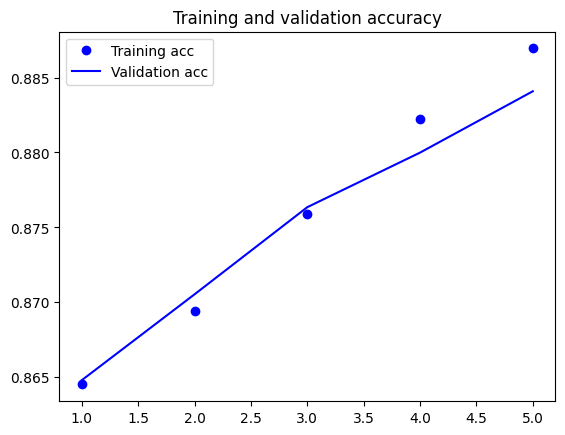

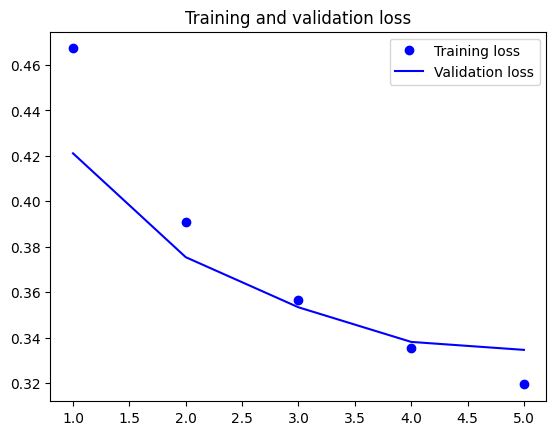

In [116]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [117]:
test_loss, test_acc, = model.evaluate(test_features, test_labels)
print("Accuracy %f    Loss: %f" % (test_acc, test_loss))

1384/1384 [==============================] - 7s 5ms/step - loss: 0.3295 - accuracy: 0.8865
Accuracy 0.886538    Loss: 0.329457


Now that the accuracy is very close to 90%, I will use it to predict the test data.

In [119]:
import numpy as np
predictions = np.argmax(model.predict(testingNum), axis=-1)

313/313 [==============================] - 1s 2ms/step


Now that the data is predicted, I can revert the integers back to their original form and write them to the amazonReviewsPredictions file.

In [120]:
with open('amazonReviewsPredictions.txt', 'w') as f:
    for rating in predictions:
        if rating == 0:
            f.write('negative\n')
        elif rating == 1:
            f.write('neutral\n')
        else:
            f.write('positive\n')

Using the function provided by the professor, I will test the format of the output file.

In [125]:
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok.")
test()

'file is working as intended.'